In [1]:
import os
import numpy as np
import pandas as pd
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

In [2]:
%matplotlib notebook

In [3]:
working_dir = '/data/datasets/organoid_phenotyping/analysis/zika_vs_mock/'
os.listdir(working_dir)

['example_roi_Artifacts.pdf',
 'average_profile_Thin-SOX2.pdf',
 'example_roi_Adjacent.pdf',
 'average_profile_Surface2.pdf',
 'average_profile_Surface1.pdf',
 'cyto_zika_umap.pdf',
 'cyto_profiles_combined.npy',
 'average_profile_TBR1-DN.pdf',
 'Zika',
 'example_roi_Surface1.pdf',
 'analysis.csv',
 'cyto_clusters_umap.pdf',
 'umap_zika_vs_mock.pdf',
 'average_profile_Artifacts.pdf',
 'umap_arlotta_vs_lancaster.pdf',
 'example_roi_TBR1-DN.pdf',
 'example_roi_Surface2.pdf',
 'volcano_plot_zika.pdf',
 'model_zikv.umap',
 'cyto_profiles_combined_samples.npy',
 'clustermap_zika_hits.pdf',
 'example_roi_Thin-SOX2.pdf',
 'Zika_mock',
 'cyto_labels_combined.npy',
 'zikv_with_FC.xlsx',
 'average_profile_Adjacent.pdf',
 'combined_features.xlsx']

In [4]:
df = pd.read_csv(os.path.join(working_dir, 'analysis.csv'), index_col=0)
df

,type
path,
20190625_14_48_13_AA_ef24-zika1_488LP15_561LP140_642LP50,Zika
20190625_15_22_42_AA_ef24-zika2_488LP20_561LP140_642LP50,Zika
20190625_16_04_10_AA_ef24-zika3_488LP18_561LP140_642LP50,Zika
20190625_16_22_54_AA_ef24-zika4_488LP18_561LP140_642LP50,Zika
20190625_16_31_09_AA_ef24-zika5_488LP14_561LP140_642LP50,Zika
20190625_17_15_27_AA_ef24-zika6_488LP25_561LP140_642LP50,Zika
20190625_12_18_15_AA_ef24-ctrl1_488LP14_561LP140_642LP50,Zika_mock
20190625_12_38_41_AA_ef24-ctrl2_488LP13_561LP140_642LP50,Zika_mock
20190625_13_00_22_AA_ef24-ctrl3_488LP15_561LP140_642LP50,Zika_mock


In [5]:
profiles = np.load(os.path.join(working_dir, 'cyto_profiles_combined.npy'))
profiles.shape

(79170, 3, 6)

In [6]:
features = profiles.reshape((len(profiles), -1))

Flattened profiles seem best here...

In [7]:
np.random.seed(7)
model = UMAP(metric='euclidean', n_neighbors=15).fit(features)
x_umap = model.transform(features)
x_umap.shape

/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/umap/rp_tree.py:450: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "make_euclidean_tree" failed type inference due to: Cannot unify RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none) and RandomProjectionTreeNode(none, bool, array(float32, 1d, C), float64, RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none), RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none)) for '$14.16', defined at /home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/umap/rp_tree.py (457)

File "../../.conda/envs/scout/lib/python3.6/site-packages/umap/rp_tree.py", line 457:
def make_euclidean_tree(data, indices, rng_state, leaf_size=30):
    <source elided>

        left_node = make_euclidean_tree(data, left_indices, rng_state, leaf_size)
        ^

[1] During: resolving callee type: recursive(type(CPUDispatcher(<function make

(79170, 2)

<IPython.core.display.Javascript object>


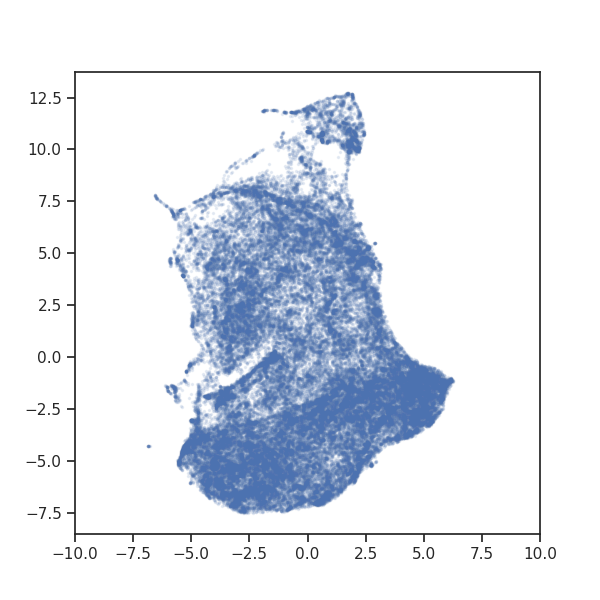

In [9]:
# Old
plt.figure(figsize=(6, 6))
plt.plot(x_umap[:, 0], x_umap[:, 1], '.', alpha=0.1, markersize=3)
plt.xlim([-10, 10])
plt.show()

<IPython.core.display.Javascript object>


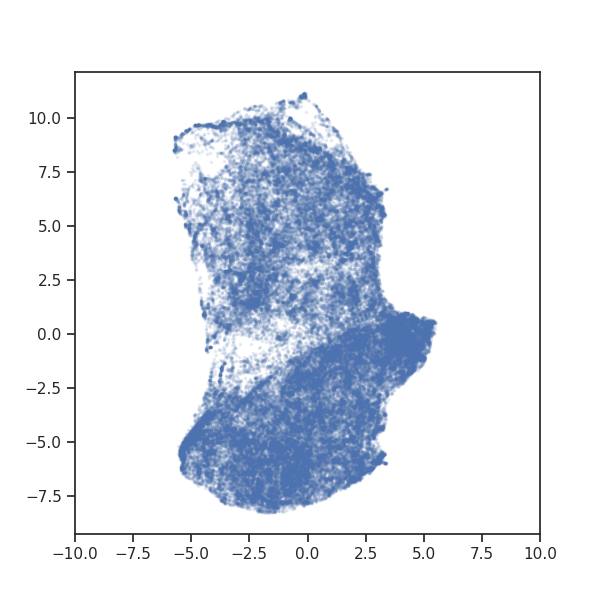

In [8]:
plt.figure(figsize=(6, 6))
plt.plot(x_umap[:, 0], x_umap[:, 1], '.', alpha=0.1, markersize=3)
plt.xlim([-10, 10])
plt.show()

Agglomerative Clustering

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
clustering = AgglomerativeClustering(n_clusters=5, linkage='average').fit(x_umap) # 8, 9, 10
labels = clustering.labels_

class_labels = np.unique(labels)
class_labels

array([0, 1, 2, 3, 4])

<IPython.core.display.Javascript object>


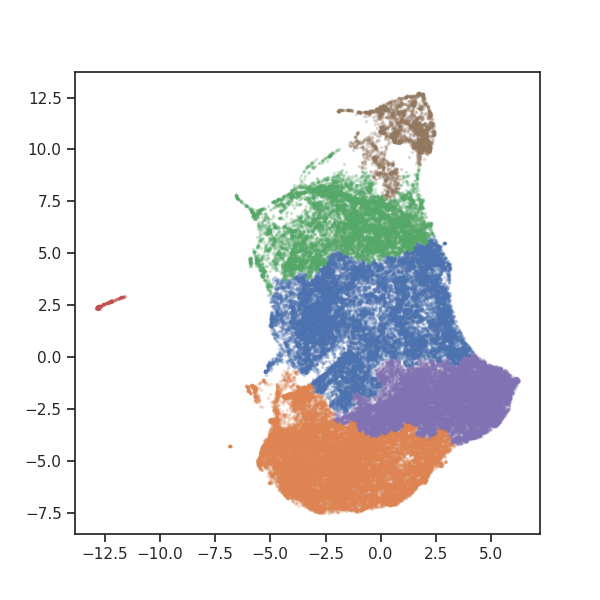

In [50]:
# Old
plt.figure(figsize=(6, 6))
for i in range(0, class_labels.max() + 1):
    idx = np.where(labels == i)[0]
    plt.plot(x_umap[idx, 0], x_umap[idx, 1], '.', alpha=0.2, markersize=3)
# plt.xlim([-8, 8])
plt.show()

<IPython.core.display.Javascript object>


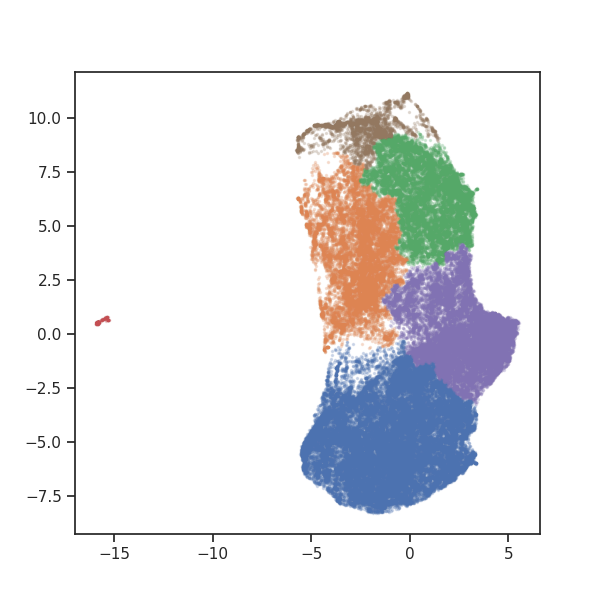

In [11]:
plt.figure(figsize=(6, 6))
for i in range(0, class_labels.max() + 1):
    idx = np.where(labels == i)[0]
    plt.plot(x_umap[idx, 0], x_umap[idx, 1], '.', alpha=0.2, markersize=3)
# plt.xlim([-8, 8])
plt.show()

<IPython.core.display.Javascript object>


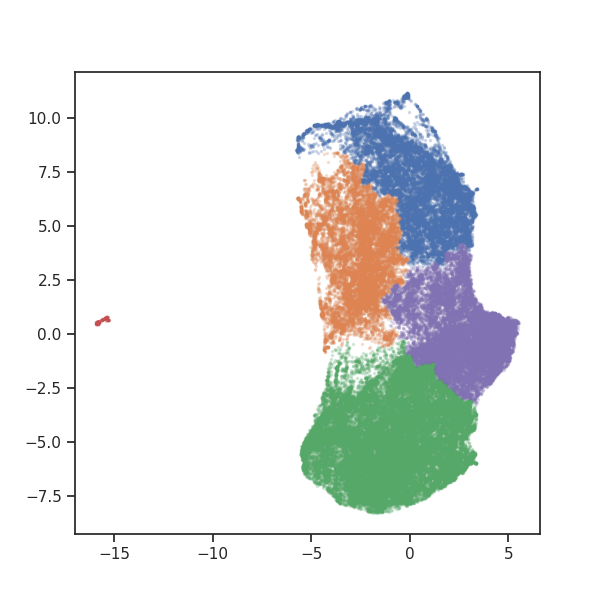

In [24]:
plt.figure(figsize=(6, 6))
for i in range(0, class_labels.max() + 1):
    idx = np.where(labels == i)[0]
    plt.plot(x_umap[idx, 0], x_umap[idx, 1], '.', alpha=0.2, markersize=3)
# plt.xlim([-8, 8])
plt.show()

Last reclustered 6 clusters, need to define cyto architectures, switched 1 and 5 from both

Show organoid labels

In [25]:
sample_labels = np.load(os.path.join(working_dir, 'cyto_profiles_combined_samples.npy')).astype(np.int)
np.unique(sample_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [26]:
idx = np.where(sample_labels<6)[0]
len(idx) / 5000

5.834

In [ ]:
sample_labels = sample_labels[good_idx]

In [39]:
cluster_names = ['Surface-TBR1',
                 'Surface-DN',
                 'DN',
                 'Artifacts',
                 'Adjacent']

<IPython.core.display.Javascript object>


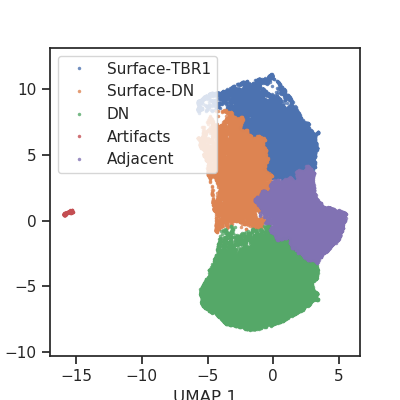

<IPython.core.display.Javascript object>


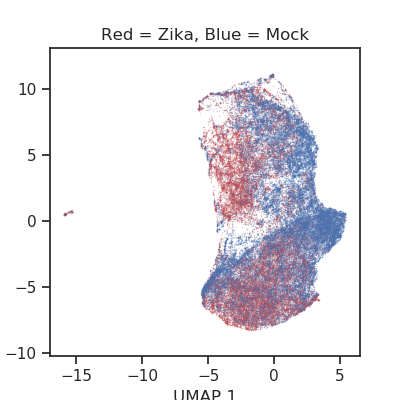

In [40]:
group1 = [1, 2, 3, 5, 6, 10]
group2 = [0, 4, 7, 8, 9, 11, 12, 15]

plt.figure(figsize=(4, 4))
for i in range(0, class_labels.max() + 1):
    idx = np.where(labels == i)[0]
    plt.plot(x_umap[idx, 0], x_umap[idx, 1], '.', alpha=0.8, markersize=5, label=f'{cluster_names[i]}', markeredgewidth=0)
plt.ylim([-10, 10])
plt.axis('equal')
plt.legend()
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.savefig(os.path.join(working_dir, 'cyto_clusters_umap.pdf'), bbox_inches='tight')
plt.show()

# 10, 8, 7, 6 in purple cluster
    
plt.figure(figsize=(4, 4))
for i in np.unique(sample_labels):
    idx = np.where(sample_labels == i)[0]
#     plt.plot(x_umap[idx, 0], x_umap[idx, 1], '.', alpha=0.1, markersize=3, label=f'Sample {i}')
    if i in group2:
        plt.plot(x_umap[idx, 0], x_umap[idx, 1], 'b.', alpha=0.3, markersize=2, markeredgewidth=0)
    elif i in group1:
        plt.plot(x_umap[idx, 0], x_umap[idx, 1], 'r.', alpha=0.3, markersize=2, markeredgewidth=0)
plt.ylim([-10, 10])
plt.axis('equal')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('Red = Zika, Blue = Mock')
plt.savefig(os.path.join(working_dir, 'cyto_zika_umap.pdf'), bbox_inches='tight')
plt.show()

Inpsect profiles interactively

In [41]:
from sklearn.neighbors import NearestNeighbors

In [42]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

<IPython.core.display.Javascript object>


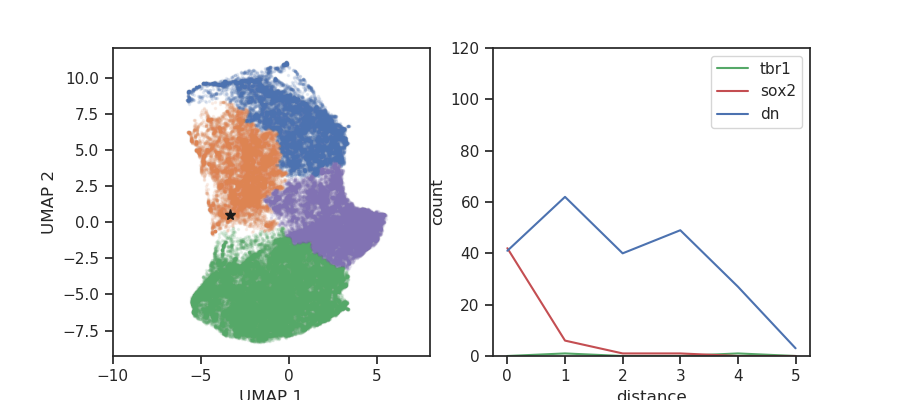

interactive(children=(FloatSlider(value=0.0, description='x', max=8.0, min=-10.0, step=0.05), FloatSlider(valu…

In [43]:
%matplotlib notebook

x = -6
y = 4

min_val = -10
max_val = 8

embedding = x_umap

fig = plt.figure(figsize=(9, 4))

ax0 = plt.subplot(121)
for i in range(class_labels.max() + 1):
    idx = np.where(labels == i)[0]
    plt.plot(embedding[idx, 0], embedding[idx, 1], '.', markersize=3, alpha=0.1)
line, = plt.plot(x, y, 'k*', markersize=8)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.xlim([min_val, max_val])

ax1 = plt.subplot(122)
ax1.set_ylim([0, 120])

nbrs = NearestNeighbors(1).fit(embedding)
dist, idx = nbrs.kneighbors(np.asarray([[x, y]]))
profile = profiles[idx][0, 0]

names = ['tbr1', 'sox2', 'dn']
colors = ['g', 'r', 'b']
line_profiles = []
for i, p in enumerate(profile):
    line_profile, = plt.plot(p, label=names[i], color=colors[i])
    line_profiles.append(line_profile)
plt.xlabel('distance')
plt.ylabel('count')
plt.legend(loc=1)
    
def update(x=0.0, y=0.0):
    line.set_xdata([x])
    line.set_ydata([y])
    
    _, idx = nbrs.kneighbors(np.asarray([[x, y]]))
    profile = profiles[idx][0, 0]
    for line_profile, p in zip(line_profiles, profile):
        line_profile.set_ydata(p)
    ax1.autoscale_view(None, False, True)
    fig.canvas.draw_idle()
    
interact(update, 
         x=widgets.FloatSlider(min=min_val, max=max_val, step=0.05),
         y=widgets.FloatSlider(min=min_val, max=max_val, step=0.05))

plt.show()

Show sample of profiles from each cluster

<IPython.core.display.Javascript object>


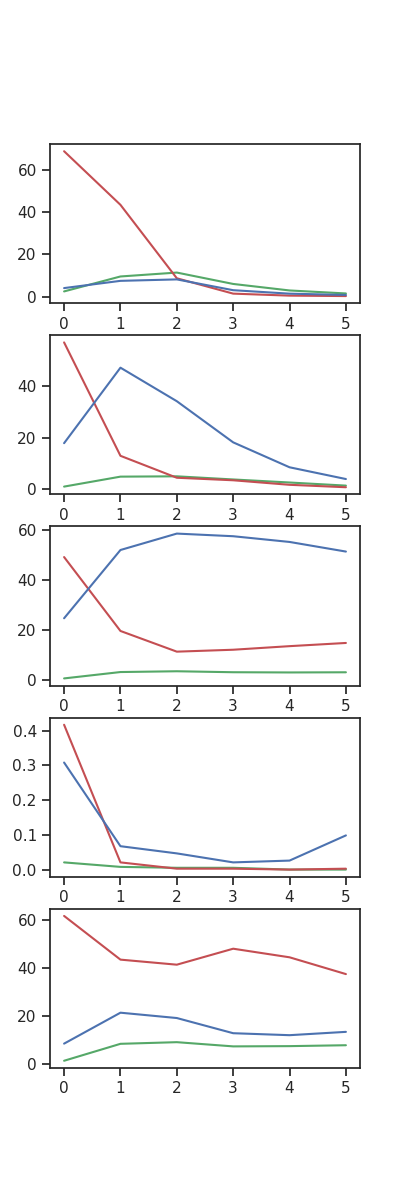

In [44]:
colors = ['g', 'r', 'b']
plt.figure(figsize=(4, 12))
for i in np.unique(class_labels):
    idx = np.where(labels == i)[0]
    profile_cluster = profiles[idx]
    average_profile = profile_cluster.mean(axis=0)
    
    plt.subplot(class_labels[-1] + 1, 1, i+1)
    for p, c in zip(average_profile, colors):
        plt.plot(p, color=c)
#     plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


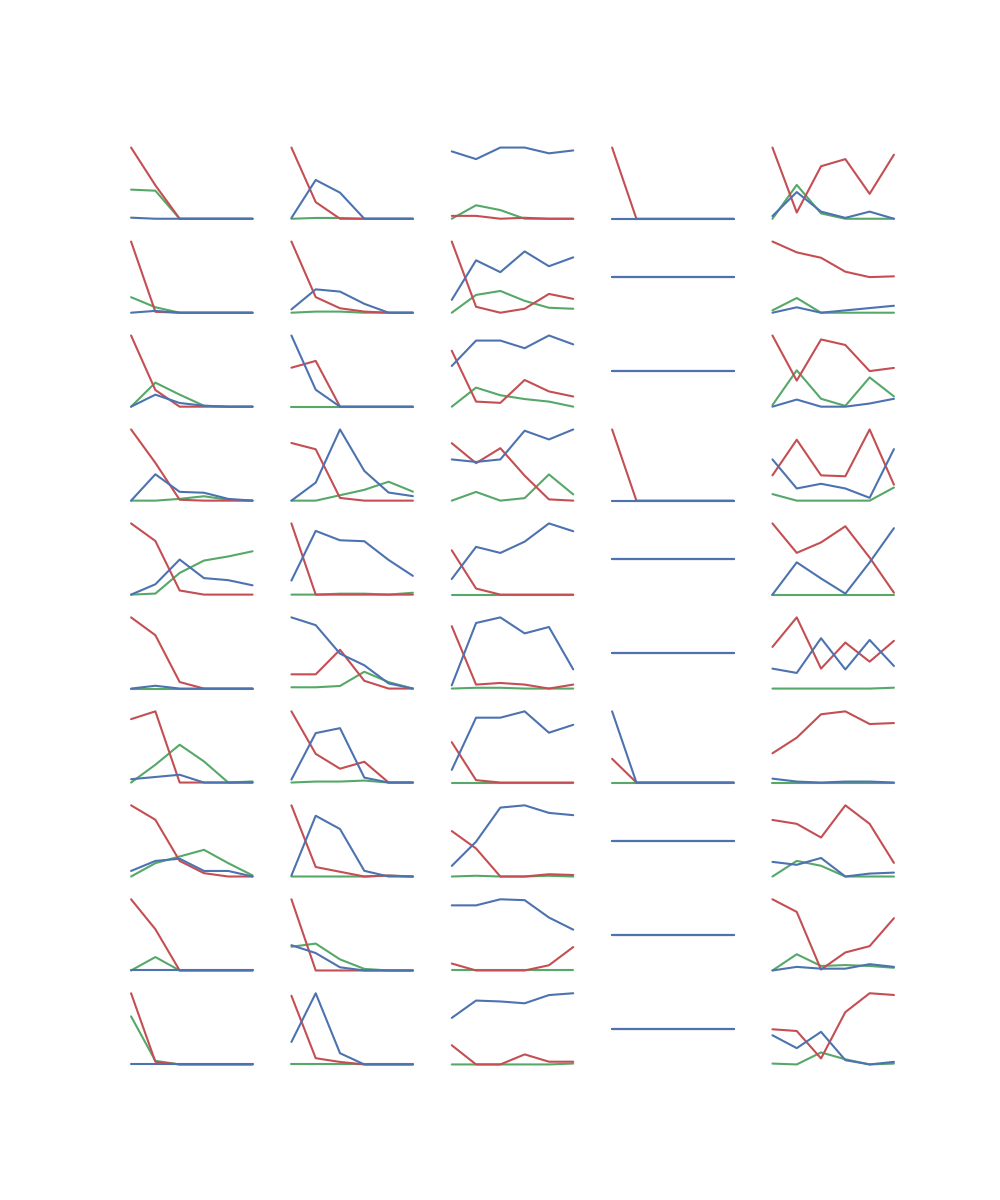

In [45]:
n_profiles = 10

plt.figure(figsize=(10, 12))
for i in np.unique(class_labels):
    idx = np.where(labels == i)[0]
    profile_cluster = profiles[idx]
    
    np.random.shuffle(profile_cluster)
    sample = profile_cluster[:n_profiles]
    
    for j, s in enumerate(sample):
        subplot_idx = len(class_labels) * j + i + 1
        plt.subplot(n_profiles, class_labels[-1] + 1, subplot_idx)
        for p, c in zip(s, colors):
            plt.plot(p, color=c)
            plt.axis('off')
plt.show()

- Euclidean distance metric, 6 clusters on UMAP looks good
- Correlation distance metric, 5 clusters may look better

Build Seaborn Lineplots

In [46]:
import pandas as pd
import seaborn as sns

,dist,count,celltype
0,0,0,tbr1
1,1,15,tbr1
2,2,21,tbr1
3,3,0,tbr1
4,4,0,tbr1


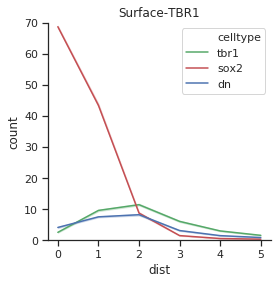

,dist,count,celltype
0,0,1,tbr1
1,1,2,tbr1
2,2,5,tbr1
3,3,1,tbr1
4,4,1,tbr1


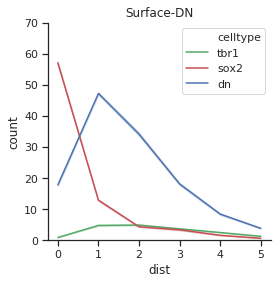

KeyboardInterrupt: 

In [138]:
%matplotlib inline

cluster_names = ['Surface-TBR1',
                 'Surface-DN',
                 'DN',
                 'Artifacts',
                 'Adjacent']

celltype_names = ['tbr1', 'sox2', 'dn']

for cluster_to_plot in range(len(cluster_names)):
    
    dist = []
    count = []
    celltype = []
    cluster = []
    
    for i, profile in enumerate(profiles):
        for k, p in enumerate(profile):
            for b, c in enumerate(p):
                cluster_name = cluster_names[labels[i]]
                if cluster_name == cluster_names[cluster_to_plot]:
                    dist.append(b)
                    count.append(c)
                    cluster.append(cluster_name)
                    celltype.append(celltype_names[k])
                    
    df = pd.DataFrame({'dist': dist, 
                       'count': count, 
                       'celltype': celltype})
    
    # Plot this cluster average profile
    plt.figure(figsize=(4, 4))
    sns.lineplot(x="dist", y="count",
             hue="celltype", ci=99, palette=['g', 'r', 'b'],
             data=df)
    plt.title(cluster_names[cluster_to_plot])
    plt.ylim([0, 70])
    sns.despine()
#     plt.savefig(os.path.join(working_dir, f'average_profile_{cluster_names[cluster_to_plot]}.pdf'),
#                 bbox_inches='tight')
    plt.show()

Save the cluster labels

In [49]:
np.unique(labels)

array([0, 1, 2, 3, 4])

In [50]:
np.save(os.path.join(working_dir, 'cyto_labels_combined.npy'), labels)

Save the UMAP embedding

In [51]:
import joblib

filename = 'model_zikv.umap'
joblib.dump(model, os.path.join(working_dir, filename))

['/data/datasets/organoid_phenotyping/analysis/zika_vs_mock/model_zikv.umap']

Extract ROIs around cluster exemplar vertices

In [52]:
from scout import io
from scout.cyto import load_mesh
from scout.utils import read_voxel_size, extract_box

In [53]:
zika_folders = list(filter(lambda x: x.startswith('2019'), os.listdir(os.path.join(working_dir, 'Zika'))))
zika_folders.sort()
mock_folders = list(filter(lambda x: x.startswith('2019'), os.listdir(os.path.join(working_dir, 'Zika_mock'))))
mock_folders.sort()
zika_dirs = [os.path.join(working_dir, 'Zika', f, 'dataset') for f in zika_folders]
mock_dirs = [os.path.join(working_dir, 'Zika_mock', f, 'dataset') for f in mock_folders]
org_dirs = zika_dirs + mock_dirs
org_dirs

['/data/datasets/organoid_phenotyping/analysis/zika_vs_mock/Zika/20190625_14_48_13_AA_ef24-zika1_488LP15_561LP140_642LP50/dataset',
 '/data/datasets/organoid_phenotyping/analysis/zika_vs_mock/Zika/20190625_15_22_42_AA_ef24-zika2_488LP20_561LP140_642LP50/dataset',
 '/data/datasets/organoid_phenotyping/analysis/zika_vs_mock/Zika/20190625_16_04_10_AA_ef24-zika3_488LP18_561LP140_642LP50/dataset',
 '/data/datasets/organoid_phenotyping/analysis/zika_vs_mock/Zika/20190625_16_22_54_AA_ef24-zika4_488LP18_561LP140_642LP50/dataset',
 '/data/datasets/organoid_phenotyping/analysis/zika_vs_mock/Zika/20190625_16_31_09_AA_ef24-zika5_488LP14_561LP140_642LP50/dataset',
 '/data/datasets/organoid_phenotyping/analysis/zika_vs_mock/Zika/20190625_17_15_27_AA_ef24-zika6_488LP25_561LP140_642LP50/dataset',
 '/data/datasets/organoid_phenotyping/analysis/zika_vs_mock/Zika_mock/20190625_12_18_15_AA_ef24-ctrl1_488LP14_561LP140_642LP50/dataset',
 '/data/datasets/organoid_phenotyping/analysis/zika_vs_mock/Zika_mock/2

In [54]:
cluster_idxs = [np.where(labels == lbl)[0] for lbl in np.unique(labels)]
cluster_centroids = np.asarray([x_umap[idx].mean(axis=0) for idx in cluster_idxs])
cluster_centroids

array([[  0.18963633,   6.9338503 ],
       [ -2.669513  ,   3.6590724 ],
       [ -1.0120045 ,  -4.806146  ],
       [-15.795789  ,   0.5372181 ],
       [  2.604721  ,   0.09576987]], dtype=float32)

In [134]:
_, idx = nbrs.kneighbors(cluster_centroids, n_neighbors=10)
neighbor_idx = np.array([2, 9, 8, 1, 5])
example_idx = idx[np.arange(len(cluster_centroids)), neighbor_idx]
example_idx

array([37514, 12139, 10703, 31669, 61240])

In [135]:
org_idxs = sample_labels[example_idx]
example_dirs = [org_dirs[p] for p in org_idxs]
example_dirs

['/data/datasets/organoid_phenotyping/analysis/zika_vs_mock/Zika_mock/20190625_12_38_41_AA_ef24-ctrl2_488LP13_561LP140_642LP50/dataset',
 '/data/datasets/organoid_phenotyping/analysis/zika_vs_mock/Zika/20190625_16_04_10_AA_ef24-zika3_488LP18_561LP140_642LP50/dataset',
 '/data/datasets/organoid_phenotyping/analysis/zika_vs_mock/Zika/20190625_16_04_10_AA_ef24-zika3_488LP18_561LP140_642LP50/dataset',
 '/data/datasets/organoid_phenotyping/analysis/zika_vs_mock/Zika_mock/20190625_12_18_15_AA_ef24-ctrl1_488LP14_561LP140_642LP50/dataset',
 '/data/datasets/organoid_phenotyping/analysis/zika_vs_mock/Zika_mock/20190702_18_48_11_eF25_M2_488LP18_561LP160_642LP50/dataset']

ROI center: [ 237 2257 2717]
[-0.19370311  0.98004824 -0.044548  ]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


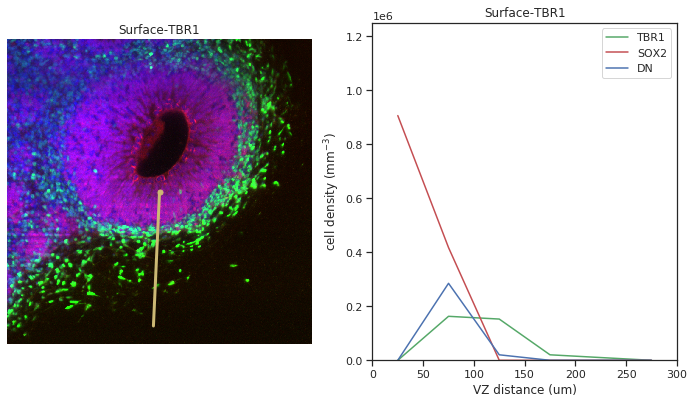

ROI center: [ 426 1583 1158]
[ 0.128776  -0.415209  -0.9005655]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


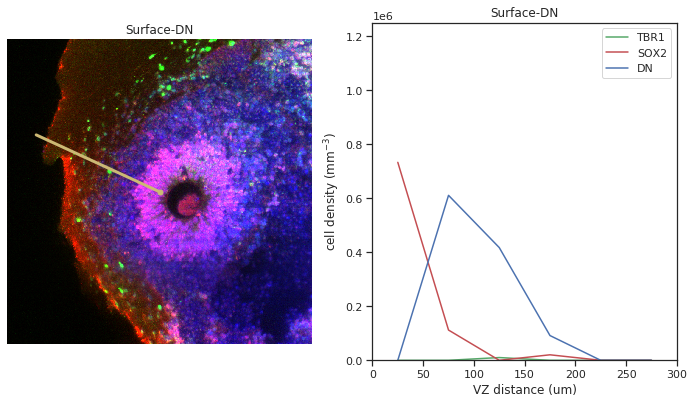

ROI center: [ 309 1274 1367]
[0.44756913 0.66528976 0.5975545 ]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


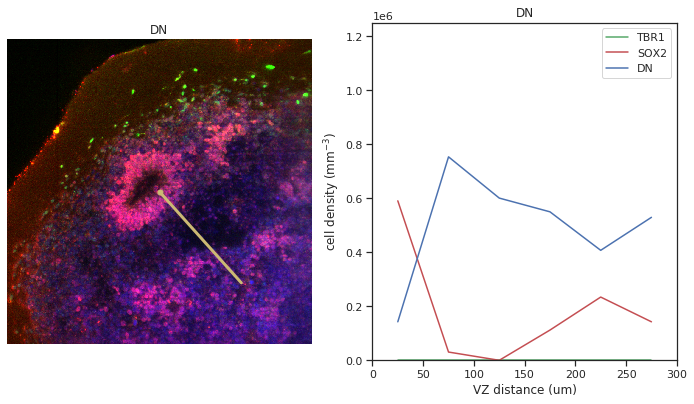

ROI center: [  70 1512 1926]
[-0.89689296 -0.26904112 -0.3509984 ]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


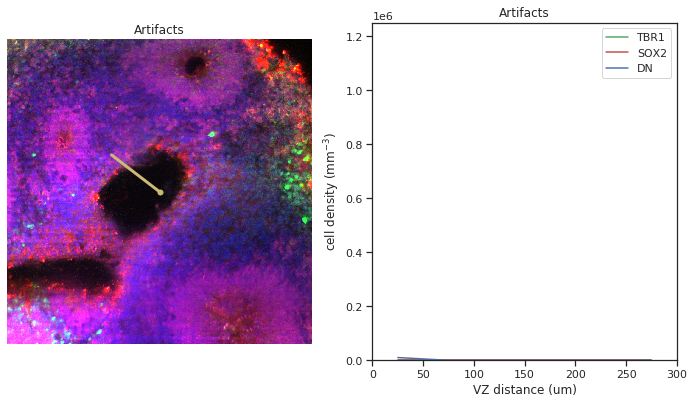

ROI center: [ 342 2495 2880]
[-0.2528088   0.8865522  -0.38744402]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


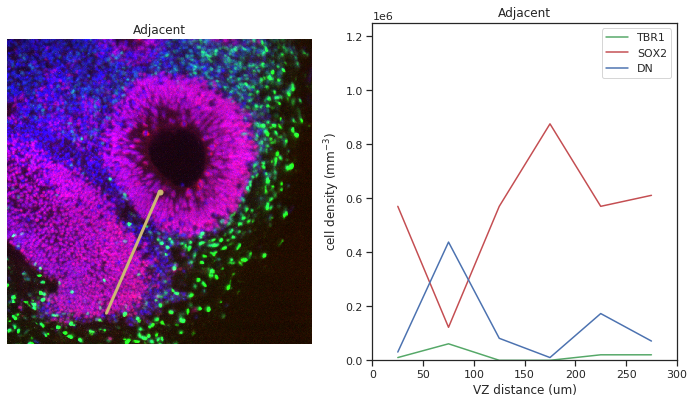

In [137]:
width = 1024
# depth = 1

org_dir = example_dirs[0]

for k, org_dir in enumerate(example_dirs):
    # Get the ROI center coordinates
    combined_sample_idx = np.where(sample_labels == org_idxs[k])[0]
    example_sample_idx = np.where(combined_sample_idx == example_idx[k])[0]
    cyto_sample_idx = np.load(os.path.join(org_dir, 'cyto_sample_index.npy'))
    example_vertex_idx = cyto_sample_idx[example_sample_idx][0]
    mesh = load_mesh(os.path.join(org_dir, 'mesh_ventricles.pkl'))
    normal = mesh['normals'][example_vertex_idx]
    example_vertex_um = mesh['verts'][example_vertex_idx]
    voxel_size = np.asarray(read_voxel_size(os.path.join(org_dir, 'voxel_size.csv')))
    example_coord = (example_vertex_um / voxel_size).astype(np.int)
    print(f'ROI center: {example_coord}')
    print(normal)

    # Extract ROI
    syto = io.open(os.path.join(org_dir, 'syto.zarr'))
    sox2 = io.open(os.path.join(org_dir, 'sox2.zarr'))
    tbr1 = io.open(os.path.join(org_dir, 'tbr1.zarr'))
    start = np.array([example_coord[0], example_coord[1] - width // 2, example_coord[2] - width // 2])
    stop = np.array([example_coord[0] + 1, example_coord[1] + width // 2, example_coord[2] + width // 2])
    syto_roi = extract_box(syto, start, stop)[0]
    sox2_roi = extract_box(sox2, start, stop)[0]
    tbr1_roi = extract_box(tbr1, start, stop)[0]
    
    # Get Profile for normal
    example_profile = profiles[example_idx[k]]
    syto_profile = example_profile

    # Plot the ROIs
    plt.figure(figsize=(12, 36))
    
    plt.subplot(len(example_dirs), 2, 2*k+1)
    plt.imshow(np.dstack([sox2_roi, tbr1_roi, syto_roi]))
    plt.plot([width // 2, normal[2] * 300/voxel_size[2] + width // 2], 
             [width // 2, normal[1] * 300/voxel_size[1] + width // 2], 
             'y-', linewidth=3)
    plt.plot([width // 2], [width // 2], 'y.', markersize=10)
    plt.axis('off')
    plt.title(f'{cluster_names[k]}')
    
    plt.subplot(len(example_dirs), 2, 2*k+2)
    example_profile = profiles[example_idx[k]]
    bin_volume = (50/1000) * (np.pi * (25/1000)**2)  # mm3
    x = np.arange(25, 325, 50)
    plt.plot(x, example_profile[0] / bin_volume, 'g-', label='TBR1')
    plt.plot(x, example_profile[1] / bin_volume, 'r-', label='SOX2')
    plt.plot(x, example_profile[2] / bin_volume, 'b-', label='DN')
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.title(f'{cluster_names[k]}')
    plt.xlabel('VZ distance (um)')
    plt.ylabel('cell density (mm$^{-3}$)')
    plt.xlim([0, 300])
    plt.ylim([0, 1_250_000])
    plt.legend()
    
    plt.savefig(os.path.join(working_dir, f'example_roi_{cluster_names[k]}.pdf'), bbox_inches='tight')
    plt.show()